<a href="https://colab.research.google.com/github/AmauriKudaka/Astro/blob/master/Amauri_Astroinform%C3%A1tica_II_Aula_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TÓPICOS DA AULA:** MANIPULAÇÃO SIMBÓLICA E NUMÉRICA EM PYTHON

RESOLUÇÃO ANALÍTICA

In [0]:
from sympy import *
# definir um conjunto de simbolos
x, y, z = symbols('x y z')
print(simplify(sqrt(sin(x)**2 + cos(x)**2)))

In [6]:
from sympy import *

x, y, z = symbols('x y z')
print(simplify(sqrt(sin(x)**2 + cos(x)**2))+(x-2)*(x+2))

(x - 2)*(x + 2) + 1


In [7]:
print(simplify(sin(x)**2 + cos(x)**2))
print(simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)))
print(simplify(gamma(x)/gamma(x - 2)))

1
x - 1
(x - 2)*(x - 1)


In [9]:
print(expand((x + 2)*(x - 3)))

x**2 - x - 6


In [0]:
print(expand((x + 2)*(x - 3)))

In [10]:
expr=expand((x + 2)*(x - 3))
print(expr.subs([(x,0)]))

-6


In [11]:
expr=expand((x + 2)*(y - 3))
print(expr.subs([(x,0),(y,5)]))



4


**Limites**

In [0]:
expr = limit((cos(x) - 1)/x, x, 0)
print(expr)
expr = limit((sin (x)/x),x,0)
print(expr)


**Derivadas**

In [0]:
diff(cos(x), x)

**Integrais**

In [13]:
expr=integrate(-cos(x), x)
print(expr)
expr=integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))
print(expr)

-sin(x)
pi


In [16]:
expr=integrate(exp(-x**2), (x, -oo, oo))
print(expr)

sqrt(pi)


In [19]:
expr=integrate(exp(-x**2), (x, 0, 10))
print(expr)

sqrt(pi)*erf(10)/2


In [0]:
## ir até a pagina sympy - cadabra - PydY - SageMAth similar Mathlab

**Equações diferenciais**

In [20]:
f, g = symbols('f g', cls=Function)
f(x).diff(x)
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
dsolve(diffeq, f(x))


Eq(f(x), (C1 + C2*x)*exp(x) + cos(x)/2)

***RESOLUÇÃO NUMÉRICA***

Rotina numérica para resolução numérica de EDO

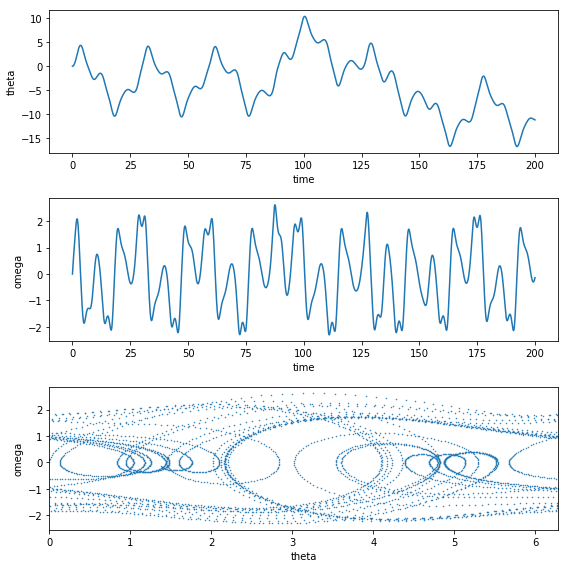

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    theta, omega = y      # unpack current values of y
    Q, d, Omega = params  # unpack parameters
    derivs = [omega,      # list of dy/dt=f functions
             -omega/Q + np.sin(theta) + d*np.cos(Omega*t)]
    return derivs

# Parameters
Q = 2.0          # quality factor (inverse damping)
d = 1.5          # forcing amplitude
Omega = 0.65     # drive frequency

# Initial values
theta0 = 0.0     # initial angular displacement
omega0 = 0.0     # initial angular velocity

# Bundle parameters for ODE solver
params = [Q, d, Omega]

# Bundle initial conditions for ODE solver
y0 = [theta0, omega0]

# Make time array for solution
tStop = 200.
tInc = 0.05
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('theta')

# Plot omega as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('time')
ax2.set_ylabel('omega')

# Plot omega vs theta
ax3 = fig.add_subplot(313)
twopi = 2.0*np.pi
ax3.plot(psoln[:,0]%twopi, psoln[:,1], '.', ms=1)
ax3.set_xlabel('theta')
ax3.set_ylabel('omega')
ax3.set_xlim(0., twopi)

plt.tight_layout()
plt.show()
